In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1번 문제: Probability Mass function(PMF)

{'Space': 1, 'Reality': 2, 'Mind': 3, 'Time': 4, 'Power': 5, 'Soul': 6}


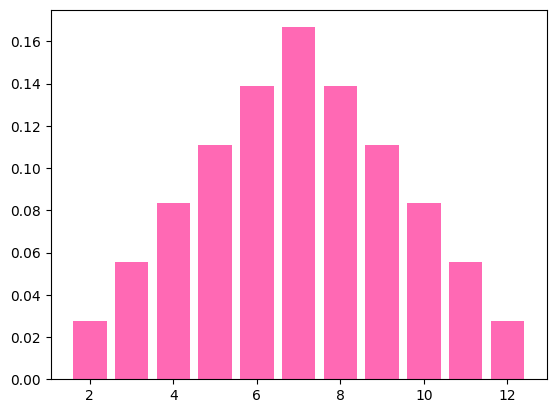

[0.027777777777777776, 0.05555555555555555, 0.08333333333333333, 0.1111111111111111, 0.1388888888888889, 0.16666666666666669, 0.1388888888888889, 0.1111111111111111, 0.08333333333333333, 0.05555555555555555, 0.027777777777777776]


In [3]:
stones = ['Space', 'Reality', 'Mind', 'Time', 'Power', 'Soul']
stones_scores = dict(zip(stones, range(1, 7))) # {'Space': 1, 'Reality': 2, 'Mind': 3, 'Time': 4, 'Power': 5, 'Soul': 6}
print(stones_scores)

n = list(range(2, 13))
pmf = [0] * 11

for i in stones:
    for j in stones:
        pmf[stones_scores[i] + stones_scores[j] - 2] += 1 / (len(stones)**2)

plt.bar(n, pmf, color='hotpink')
plt.show()

print(pmf)
### start ###

### 2번 문제: PMF estimation

In [4]:
def gen_data(func): # 입력된 PMF를 기반으로 data를 생성하는 함수
    num_data=10000
    x= np.linspace(0,99,100)
    
    # func의 argument는 수정 가능
    p= func(x)
    
    error= 1-np.sum(p)
    if error<0.1 and error >= 0:
        p+=error/len(p)
    else:
        print("error:",error," p의 총합이 1이 안됩니다.")
        return -100
    
    g_data = np.random.choice(x,num_data,p=p,replace=True)
    return g_data

def test(data, func):
    error=0
    test_num = 1000
    for i in range(test_num):
        error += np.mean(np.abs(np.sort(data)-np.sort(gen_data(func))))
    
    print("error:",error/test_num)
    return

In [5]:
data = np.load("data.npy")
print(data)
_ = plt.hist(data, 100, density=True)

FileNotFoundError: [Errno 2] No such file or directory: 'data.npy'

In [ ]:
x= np.linspace(0,99,100)

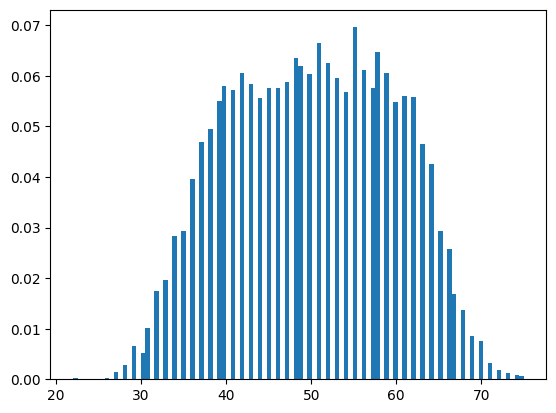

In [ ]:
import math
fac = math.factorial

def func(x):
    x = np.int8(x)
    n_f = fac(len(x))
    k_f = np.array([fac(i) for i in x])
    n_k_f = np.array([fac(len(x)-i) for i in x])

    prob = [0.4, 0.5, 0.6]
    li = []

    for p in prob:
        p_pow_k = p ** x
        p_pow_n_k = (1-p) ** (len(x) - x)
        li.append(np.float64(n_f / (k_f * n_k_f) * p_pow_k * p_pow_n_k))

    ret = 0
    for i in li:
        ret += i
    ret /= 3

    return ret

# def func(x):
#     x = np.int8(x)
#     p = 0.5
#     r = 50
#     r_f = fac(r - 1)

#     xCr = np.array([fac(i + r - 1) / (fac(i) * r_f) for i in x])
#     p_pow_r = p ** r
#     p_pow_k_r = (1-p) ** x

#     ret = xCr * p_pow_r * p_pow_k_r
#     ret = np.float64(ret)

#     return ret

my_data = gen_data(func)
_ = plt.hist(my_data, 100, density=True)

In [ ]:
test(data, func) # uniform

error: 0.14270779999999986


## 고찰
 - 3개의 이항분포를 사용해 구현했는데 처음에 어떻게 구현해야 할지 몰라서 당황했다.
 - 모든 PMF, PDF를 다 구현해보아도 두꺼운 확률분포 그래프가 그려지지 않아 여러개를 합성해봐야겠단 생각이 들었다.
 - 3개를 적절히 합성하니 오차가 0.15로 줄었다.